In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

In [10]:
path1="F:/Processing/"
regions=['Region_1_Corrected','Region_2_Corrected','Region_4_Corrected','Region_5_Corrected',
'Region_6_Corrected','Region_7_Corrected','Region_8_Corrected','Region_9_Corrected','Region_10_Corrected','Region_11_Corrected']

path2="/preprocessing/CARE/spots/DECODED_spots_PRMC_filt.csv"

In [11]:
dic={'Region_1_Corrected':'H','Region_2_Corrected':'H','Region_4_Corrected':'H','Region_5_Corrected':'H',
'Region_6_Corrected':'H','Region_7_Corrected':'A','Region_8_Corrected':'A','Region_9_Corrected':'A','Region_10_Corrected':'A','Region_11_Corrected':'A'}


In [63]:
dicnum={'Region_1_Corrected':'51','Region_2_Corrected':'52','Region_4_Corrected':'35','Region_5_Corrected':'37',
'Region_6_Corrected':'81','Region_7_Corrected':'49','Region_8_Corrected':'94','Region_9_Corrected':'96','Region_10_Corrected':'48','Region_11_Corrected':'90'}


In [49]:
for reg in regions:
    cs=pd.read_csv(path1+reg+path2)
    cs['sample']=reg
    if reg==regions[0]:
        tot=cs
    else:
        tot=pd.concat([tot,cs])

In [50]:
tot=tot.loc[tot['qcscore_mean']>0.45,:]

In [51]:
totgroup=tot.groupby('sample').count()

In [52]:
totgroup['sample']=totgroup.index
totgroup['sample']=totgroup['sample']+'_'+totgroup['sample'].map(dic)+'_'+totgroup['sample'].map(dicnum)

Text(0.5, 1.0, 'Number_of_reads_by_sample')

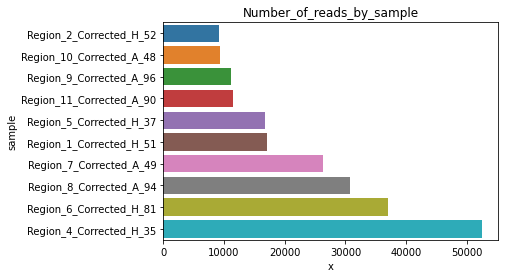

In [160]:
sns.barplot(data=totgroup.sort_values('x'),y='sample',x='x',orient='h')
plt.title('Number_of_reads_by_sample')

In [58]:
ts

sample,Region_10_Corrected,Region_11_Corrected,Region_1_Corrected,Region_2_Corrected,Region_4_Corrected,Region_5_Corrected,Region_6_Corrected,Region_7_Corrected,Region_8_Corrected,Region_9_Corrected
target,,,,,,,,,,
A2M,2,25,67,9,132,57,17,12,23,22
ACAN,3,3,10,2,31,27,14,6,7,8
ACKR1,6,17,23,13,214,54,79,47,52,21
ACTA2,13,60,175,37,588,511,150,26,828,338
ADIRF,12,25,23,10,113,113,96,44,41,17
...,...,...,...,...,...,...,...,...,...,...
WNT2B,6,3,8,7,35,15,14,7,8,3
WNT5A,4,15,4,0,28,34,50,7,22,7
WNT7B,7,4,6,0,14,11,35,14,3,2


In [57]:
ts=pd.crosstab(tot['target'],tot['sample'])
tsn=(ts/np.sum(ts))*100

In [59]:
tsn=(ts/np.sum(ts))*100

In [60]:
tsn

sample,Region_10_Corrected,Region_11_Corrected,Region_1_Corrected,Region_2_Corrected,Region_4_Corrected,Region_5_Corrected,Region_6_Corrected,Region_7_Corrected,Region_8_Corrected,Region_9_Corrected
target,,,,,,,,,,
A2M,0.021498,0.217732,0.394002,0.097635,0.251242,0.340868,0.045821,0.045487,0.074712,0.196131
ACAN,0.032248,0.026128,0.058806,0.021697,0.059004,0.161464,0.037735,0.022744,0.022738,0.071320
ACKR1,0.064495,0.148058,0.135254,0.141028,0.407316,0.322928,0.212932,0.178159,0.168913,0.187216
ACTA2,0.139740,0.522557,1.029109,0.401389,1.119169,3.055855,0.404302,0.098556,2.689622,3.013283
ADIRF,0.128991,0.217732,0.135254,0.108483,0.215078,0.675756,0.258753,0.166787,0.133182,0.151556
...,...,...,...,...,...,...,...,...,...,...
WNT2B,0.064495,0.026128,0.047045,0.075938,0.066617,0.089702,0.037735,0.026534,0.025987,0.026745
WNT5A,0.042997,0.130639,0.023522,0.000000,0.053294,0.203325,0.134767,0.026534,0.071463,0.062405
WNT7B,0.075245,0.034837,0.035284,0.000000,0.026647,0.065782,0.094337,0.053068,0.009745,0.017830


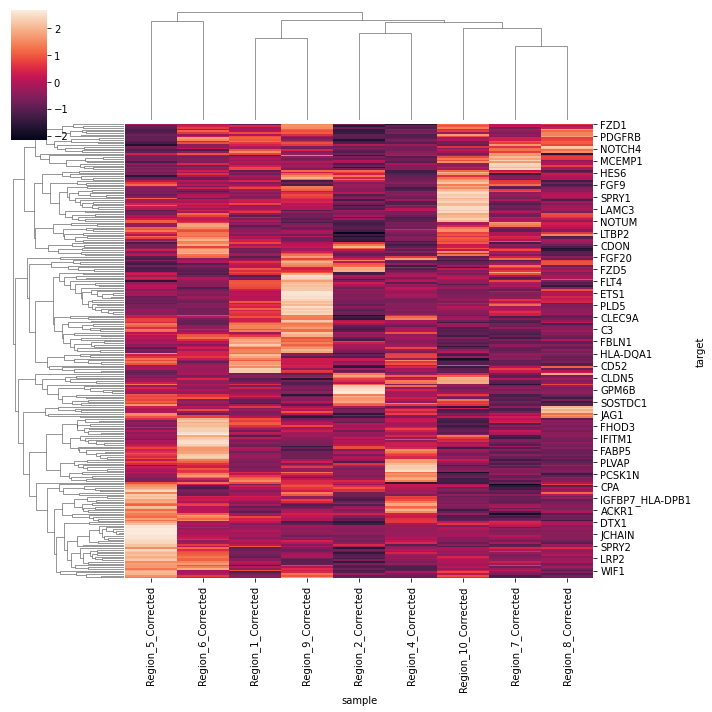

In [31]:
import seaborn as sns
sns.clustermap(tsn,z_score=0)

In [39]:
dic={'Region_1_Corrected':'H','Region_2_Corrected':'H','Region_4_Corrected':'H','Region_5_Corrected':'H',
'Region_6_Corrected':'H','Region_7_Corrected':'A','Region_8_Corrected':'A','Region_9_Corrected':'A','Region_10_Corrected':'A','Region_11_Corrected':'A'}


In [44]:
tot['status']=tot['sample'].map(dic)

<ipython-input-44-6e4304084997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tot['status']=tot['sample'].map(dic)


In [45]:
hel=pd.crosstab(tot['target'],tot['status'])

In [124]:
helnorm=hel.div(np.sum(hel,axis=0),axis=1)*100

In [125]:
helnorm['A']

target
A2M      0.094204
ACAN     0.030280
ACKR1    0.160371
ACTA2    1.418670
ADIRF    0.155886
           ...   
WNT2B    0.030280
WNT5A    0.061681
WNT7B    0.033644
ZFP36    0.107662
ZG16B    0.057195
Name: A, Length: 264, dtype: float64

In [126]:
diff=pd.DataFrame(+helnorm['A']-helnorm['H']/(helnorm['A']+helnorm['H']))

In [127]:
diff['ind']=diff.index

In [128]:
diff=diff.sort_values(by=0)

<AxesSubplot:xlabel='0', ylabel='ind'>

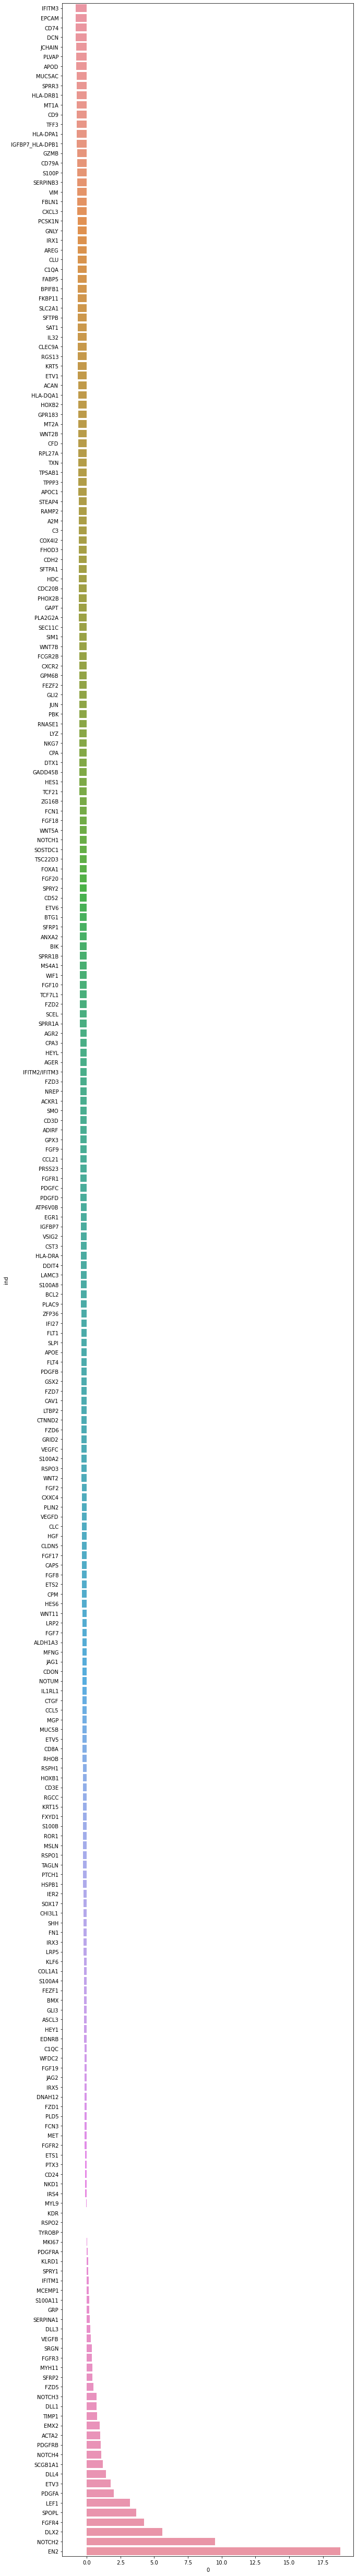

In [129]:
plt.figure(figsize=(10,90))
sns.barplot(y='ind',x=0,data=diff,orient='h')

In [106]:
hels=pd.crosstab(tot['target'],tot['sample'])
helnorms=hels.div(np.sum(hels,axis=0),axis=1)*100

In [107]:
tp=helnorms.transpose()

In [108]:
tp['sample']=tp.index

In [109]:
tpn=tp.loc[['Region_1_Corrected','Region_2_Corrected','Region_4_Corrected','Region_5_Corrected',
'Region_6_Corrected','Region_7_Corrected','Region_8_Corrected','Region_9_Corrected','Region_10_Corrected','Region_11_Corrected'],:]

Index(['IFITM3', 'EPCAM', 'CD74', 'DCN', 'JCHAIN', 'PLVAP', 'APOD', 'MUC5AC',
       'SPRR3', 'HLA-DRB1',
       ...
       'SCGB1A1', 'DLL4', 'ETV3', 'PDGFA', 'LEF1', 'SPOPL', 'FGFR4', 'DLX2',
       'NOTCH2', 'EN2'],
      dtype='object', name='target', length=264)

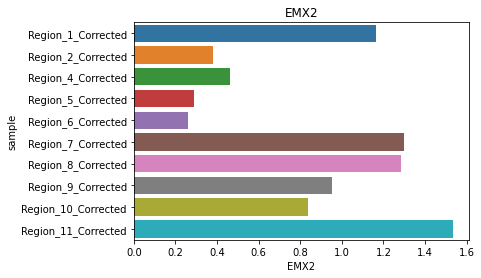

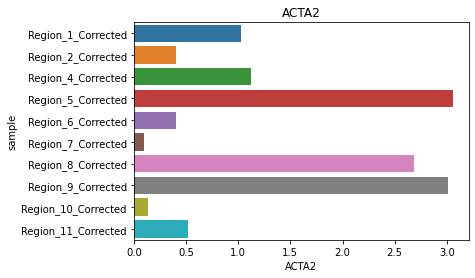

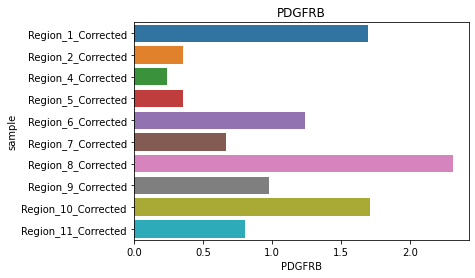

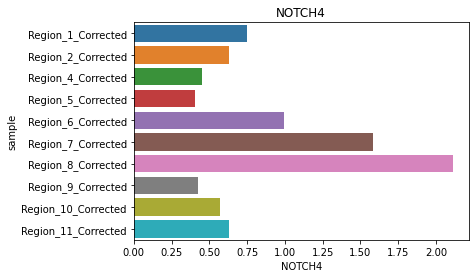

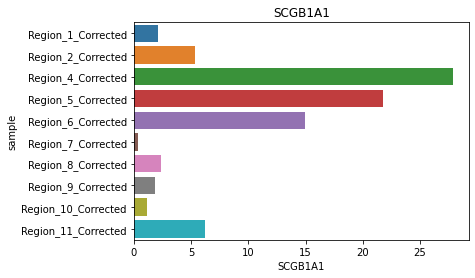

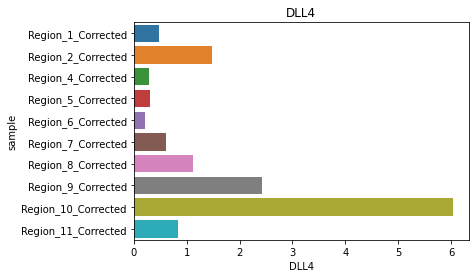

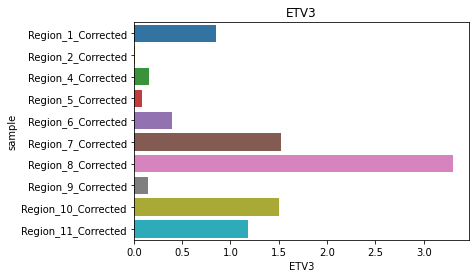

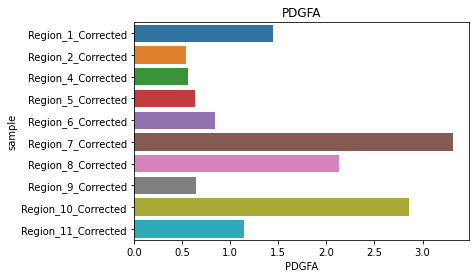

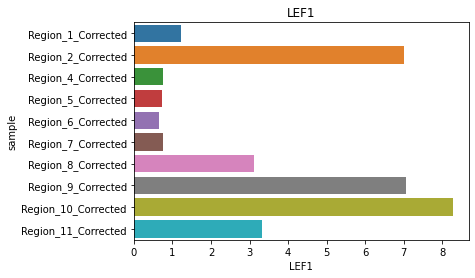

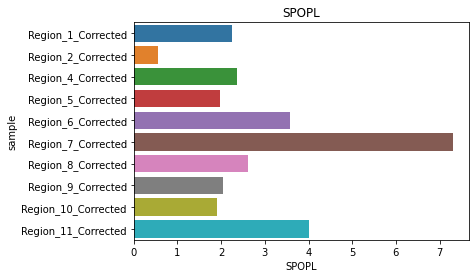

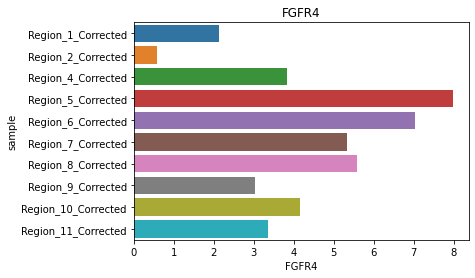

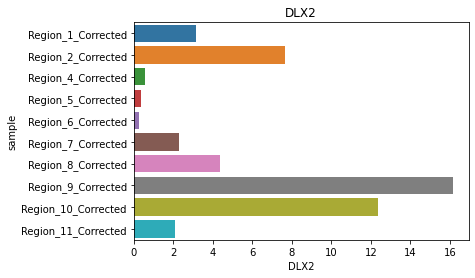

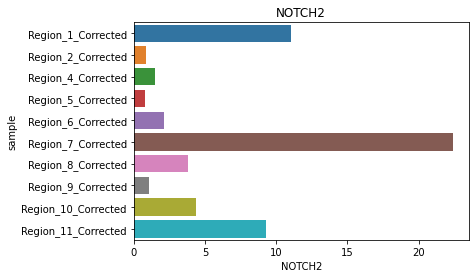

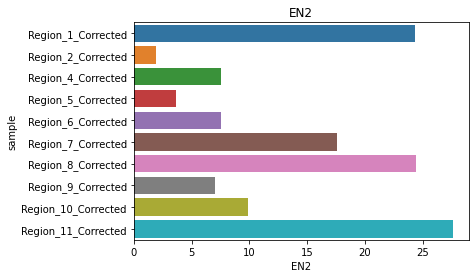

In [137]:
for s in diff.index[250:265]:
    sns.barplot(data=tpn,y='sample',x=s,orient='h')
    plt.title(s)
    plt.show()

In [6]:
import os
os.chdir(r'C:\Users\sergio.salas\Downloads\ISS_decoding-main\ISS_decoding-main\ISS_decoding')
import qc_metrics as QC

In [15]:
QC.quality_per_cycle(tot,cycles=6)

KeyError: 'quality_all_bases'

In [19]:
tot

,Unnamed: 0,Unnamed: 0.1,intensity,z,y,x,radius,spot_id,z_min,z_max,...,qcscore_mean,qcscore_minimum,qc_base1,qc_base2,qc_base3,qc_base4,qc_base5,qc_base6,samp,sample
0,15,15,0.000003,0,5999,4586,2.0,15,0.0,1.0,...,0.935492,0.893694,0.907186,0.958549,0.893694,0.994714,0.935174,0.923633,fov_000.csv,Region_1_Corrected
1,17,17,0.000108,0,5999,4517,3.0,17,0.0,1.0,...,0.624499,0.415335,0.570370,0.415335,0.821765,0.563636,0.432432,0.943453,fov_000.csv,Region_1_Corrected
2,18,18,0.003728,0,5999,4497,2.0,18,0.0,1.0,...,0.743584,0.534247,0.970218,0.594203,0.972540,0.659864,0.534247,0.730435,fov_000.csv,Region_1_Corrected
3,19,19,0.000040,0,5999,4463,3.0,19,0.0,1.0,...,0.881684,0.465257,0.986398,0.465257,0.894772,0.984841,0.967179,0.991659,fov_000.csv,Region_1_Corrected
4,25,25,0.000336,0,5999,3781,2.0,25,0.0,1.0,...,0.738217,0.371429,0.886391,0.736590,0.371429,0.964666,0.610329,0.859895,fov_000.csv,Region_1_Corrected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,49750,49750,0.000509,0,126,3128,2.0,49750,0.0,1.0,...,0.699357,0.464455,0.757576,0.905882,0.805921,0.464455,0.692308,0.570000,fov_000.csv,Region_11_Corrected
11478,49752,49752,0.000080,0,123,3203,2.0,49752,0.0,1.0,...,0.763666,0.567568,0.847978,0.567568,0.904418,0.643791,0.766990,0.851250,fov_000.csv,Region_11_Corrected
11479,49757,49757,0.000020,0,122,123,2.0,49757,0.0,1.0,...,0.647032,0.369906,0.898104,0.450000,0.509804,0.369906,0.817276,0.837104,fov_000.csv,Region_11_Corrected
11480,49762,49762,0.000066,0,121,3128,2.0,49762,0.0,1.0,...,0.586697,0.362637,0.733894,0.543478,0.463415,0.362637,0.520833,0.895928,fov_000.csv,Region_11_Corrected


In [24]:
tot=tot.reset_index()

ValueError: cannot reindex from a duplicate axis

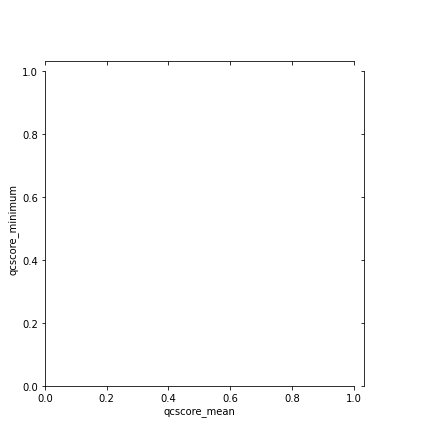

In [22]:
QC.compare_scores(tot,score1='qcscore_mean',score2='qcscore_minimum',hue='assigned',kind='hist',color='#3266a8',format_base_quality=True)

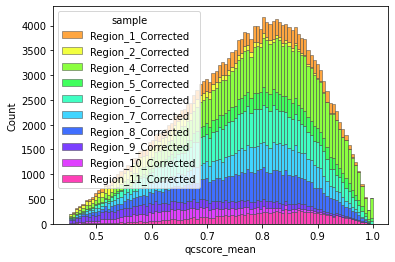

In [30]:
QC.plot_scores(tot,on='qcscore_mean',hue='sample',format_base_quality=True,palette='hsv')

In [38]:
meanqualities=tot.groupby('sample').mean()
meanqualities['sample']=meanqualities.index

<AxesSubplot:xlabel='qcscore_mean', ylabel='sample'>

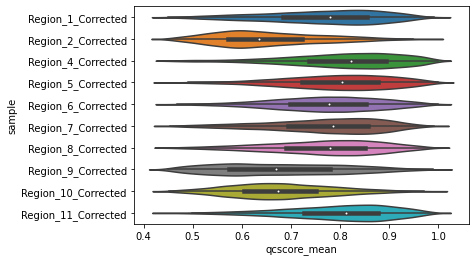

In [45]:
import seaborn as sns
sns.violinplot(data=tot,x='qcscore_mean',y='sample',orient='h')

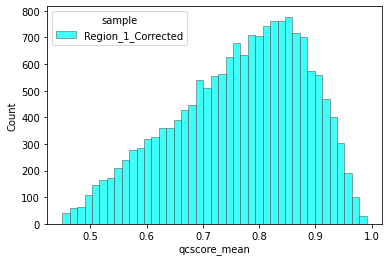

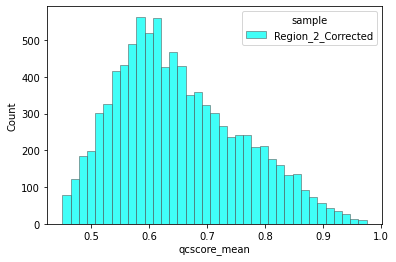

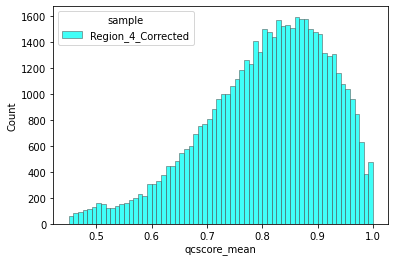

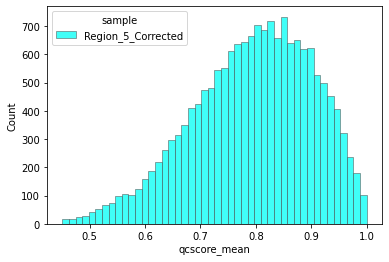

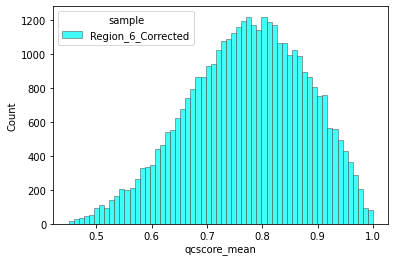

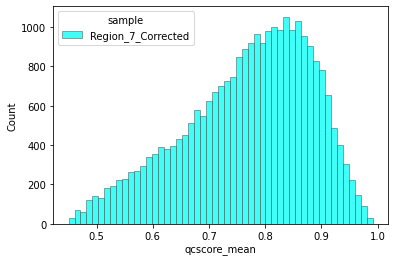

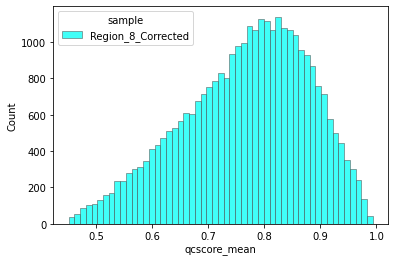

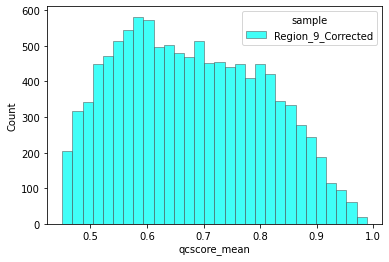

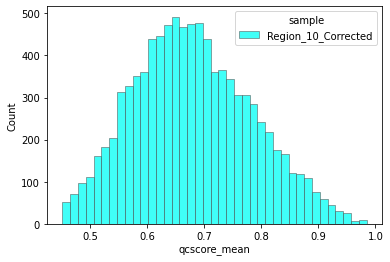

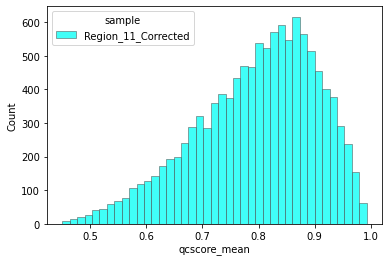

In [33]:
for s in tot['sample'].unique():
    tota=tot[tot['sample']==s]
    plt.figure()
    QC.plot_scores(tota,on='qcscore_mean',hue='sample',format_base_quality=True,palette='hsv')

In [47]:
! pip install researchpy

In [48]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

In [ ]:
rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
         group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")

In [69]:
tsn.iloc[0,:][tsn.columns.map(dic)=='A']

sample
Region_10_Corrected    0.021498
Region_11_Corrected    0.217732
Region_7_Corrected     0.045487
Region_8_Corrected     0.074712
Region_9_Corrected     0.196131
Name: A2M, dtype: float64

In [82]:
pvals=[]
ts=[]
for n in range(0,tsn.shape[0]):
    summ,results=rp.ttest(group1= tsn.iloc[n,:][tsn.columns.map(dic)=='H'], group1_name= "H",
         group2= tsn.iloc[n,:][tsn.columns.map(dic)=='A'], group2_name= "A")
    t=results.iloc[2,1] # this is t
    pvalue=results.iloc[3,1] # this is PVALUE
    pvals.append(pvalue)
    ts.append(t)
ttest_results=pd.DataFrame([pvals,ts],columns=tsn.index,index=['pvalue','t']).transpose()
ttest_results=ttest_results.sort_values(by='pvalue')
significative=ttest_results[ttest_results['pvalue']<0.05]

In [100]:
significative

,pvalue,t
target,,
GADD45B,0.0010,5.0388
HOXB1,0.0038,-4.0279
CXCR2,0.0039,4.0115
BPIFB1,0.0088,3.4406
DDIT4,0.0100,3.3522
GPX3,0.0114,3.2674
KRT5,0.0120,3.2357
KDR,0.0124,-3.2103
EMX2,0.0125,-3.2075


Text(0, 0.5, 'p value')

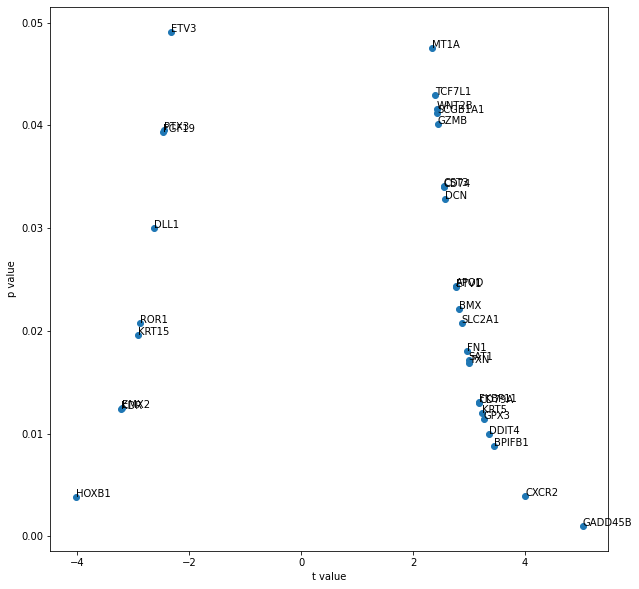

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(significative['t'],significative['pvalue'])
for sig in range(0,significative.shape[0]):
    plt.text(significative.iloc[sig,1],significative.iloc[sig,0],significative.index[sig])
plt.xlabel('t value')
plt.ylabel('p value')

In [117]:
tpn.index=tpn.index+'_'+tpn.index.map(dic)

In [119]:
tpn['sample']=tpn.index

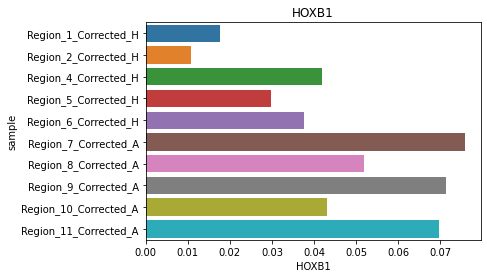

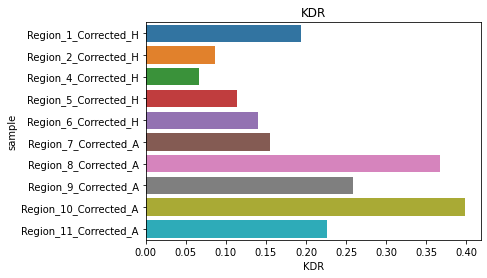

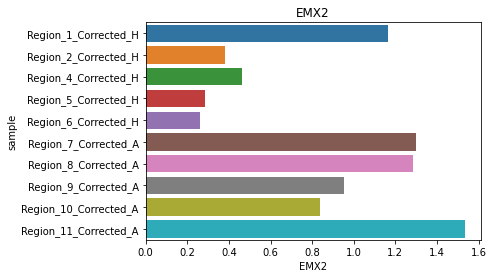

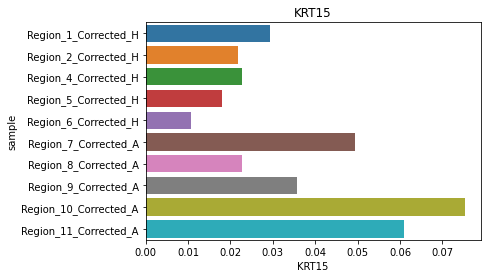

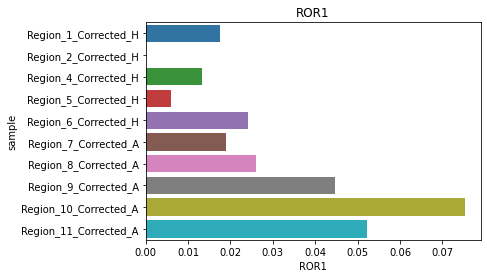

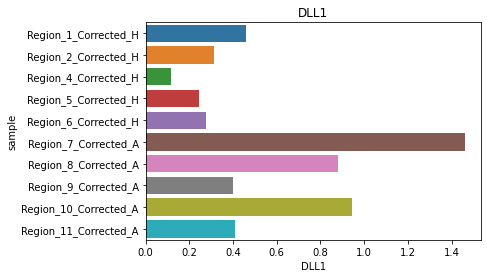

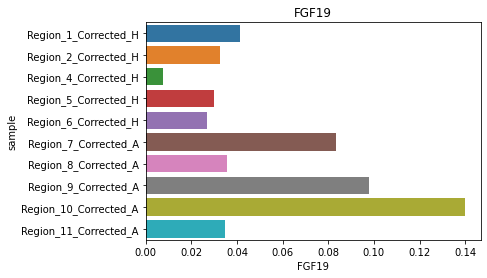

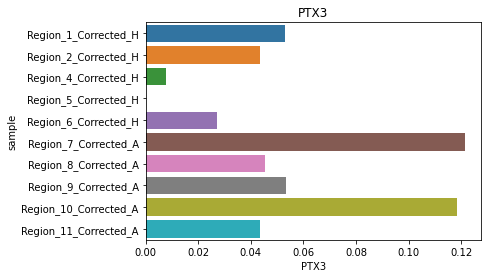

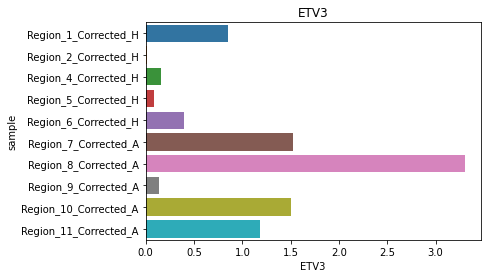

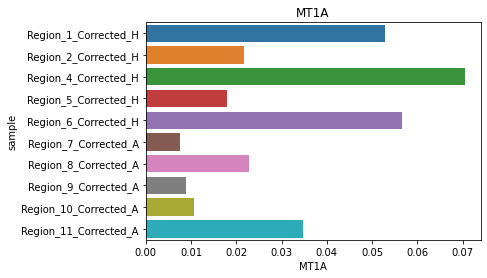

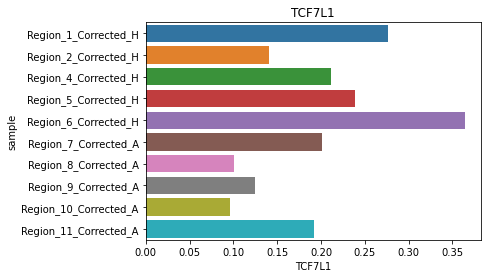

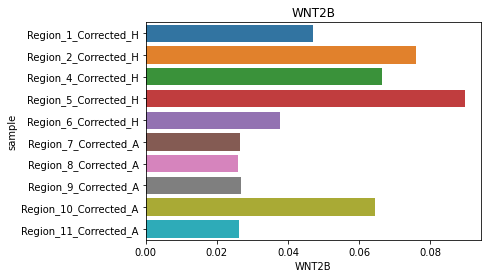

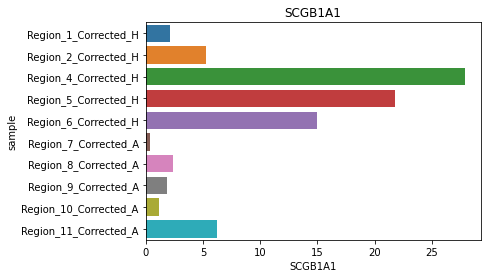

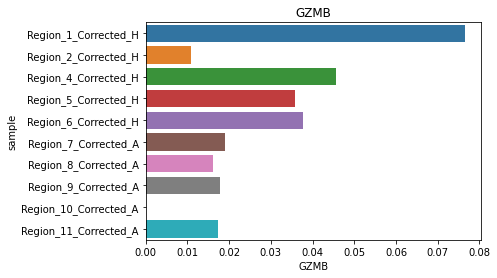

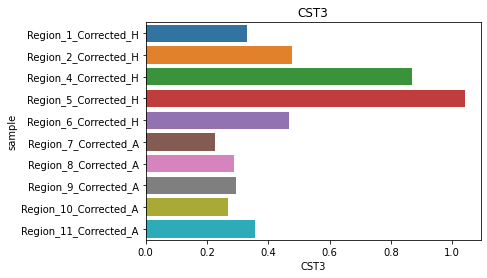

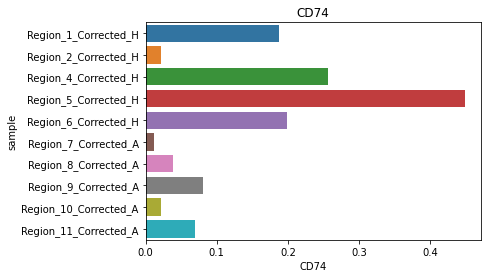

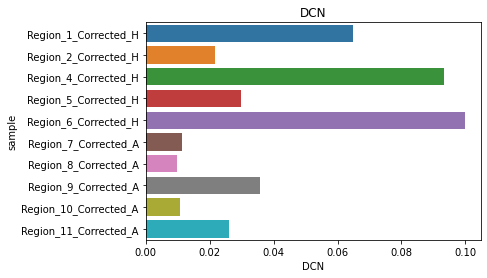

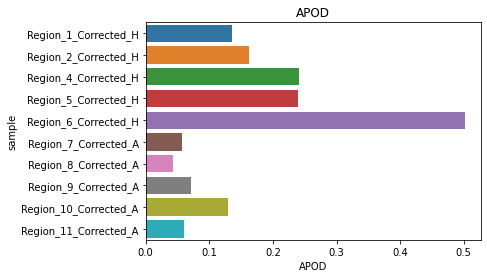

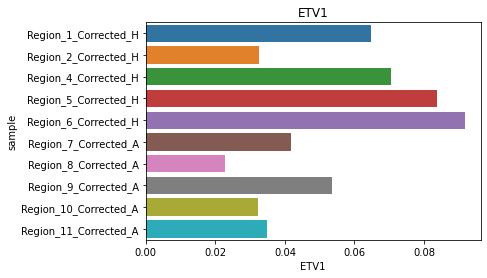

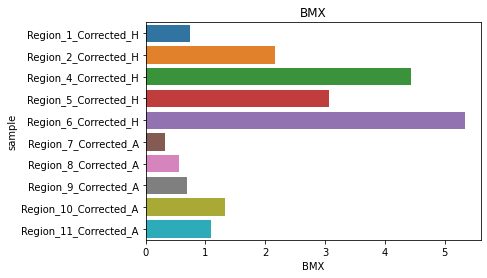

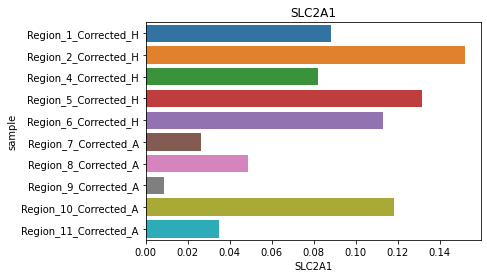

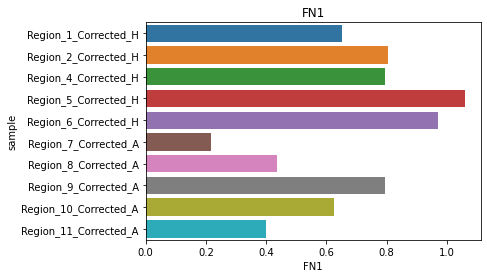

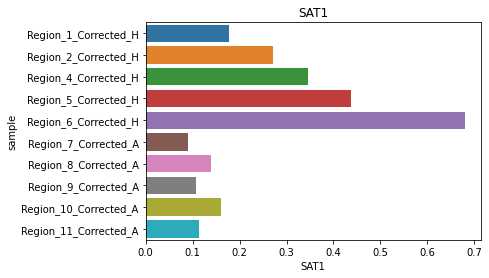

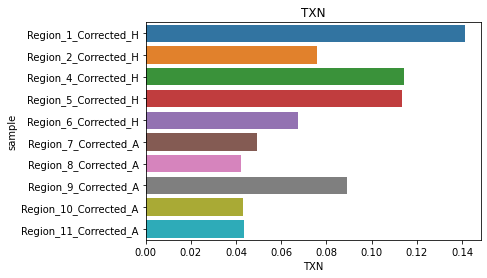

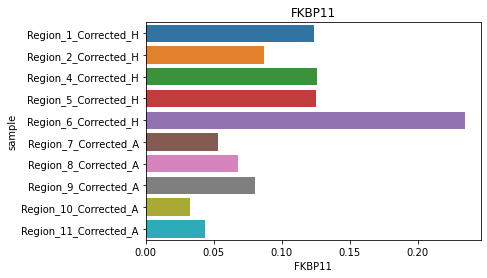

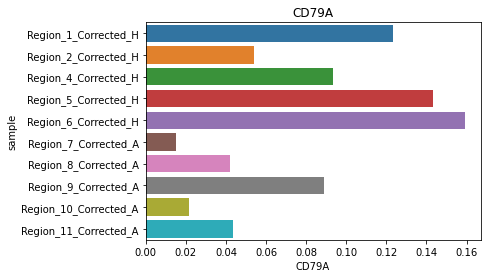

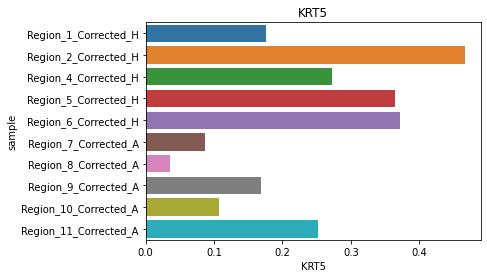

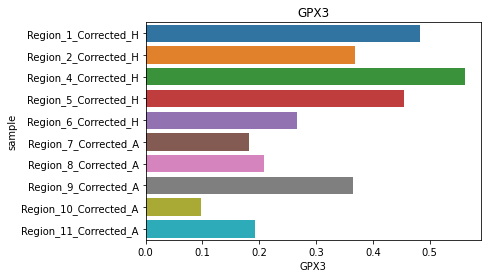

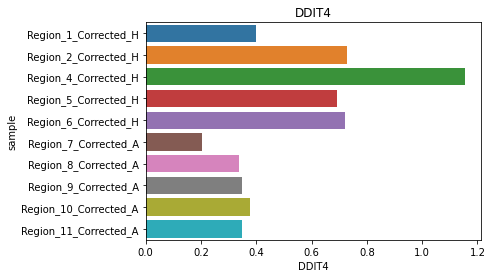

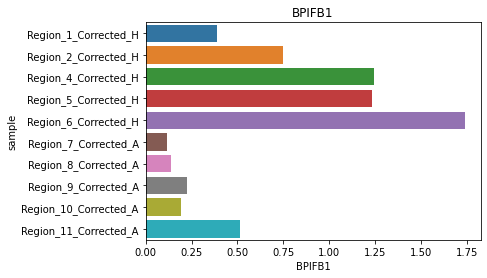

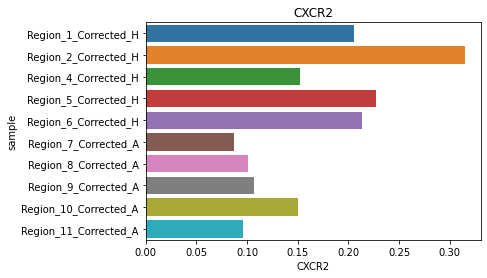

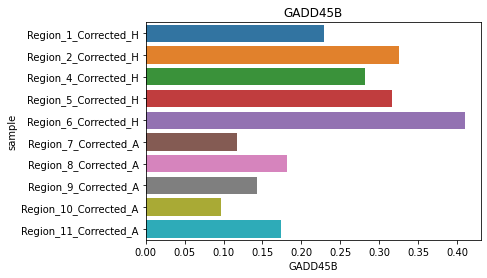

In [120]:
for s in significative.sort_values(by='t').index:
    sns.barplot(data=tpn,y='sample',x=s,orient='h')
    plt.title(s)
    plt.show()